# Objective:
The objective of the Fake News Prediction project is to develop a machine learning model that can classify news articles or headlines 
as "Fake" or "Real" based on their content and associated metadata.

# Understanding Business Problems for " Fake News Prediction "
The goal is to create a reliable solution that automatically detects fake news, ensuring the promotion of accurate information, reducing 
misinformation spread, enhancing platform credibility, and helping stakeholders efficiently combat fake news.

# Problem Statement:
The goal is to create a system that automatically detects fake news by predicting whether a news article is fake or not. We will use a method 
to select the most important features and build a model that accurately classifies news, helping to reduce misinformation and promote trustworthy content.

In [363]:
# lib for extraction ,manipulation,analysis
import numpy as np
import pandas as pd
# for visualtion
import matplotlib.pyplot as plt
import seaborn as sns
# for stats
import scipy.stats 
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore
# train test split
from sklearn.model_selection import train_test_split

In [364]:
# importing dataset
data=pd.read_csv(r"C:\Users\deshm\OneDrive\Desktop\Python\Fake_News_EDA_Data.csv")
data

,id,headline,author,content,source,published_date,engagement_score,clicks,read_time,sentiment_score,is_fake
0,1,Headline 1,Anonymous,Content of news article 1,Blog,2019-01-01 00:00:00,97,3318,13,0.393979,0
1,2,Headline 2,Jane Smith,Content of news article 2,Independent,2019-01-01 06:00:00,34,1943,4,0.354025,0
2,3,Headline 3,Reporter X,Content of news article 3,Blog,2019-01-01 12:00:00,84,1817,2,0.637002,1
3,4,Headline 4,Anonymous,Content of news article 4,News Source 1,2019-01-01 18:00:00,52,1022,9,0.211860,0
4,5,Headline 5,Anonymous,Content of news article 5,News Source 1,2019-01-02 00:00:00,8,2801,1,0.419411,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Headline 4996,Reporter X,Content of news article 4996,Independent,2022-06-02 18:00:00,45,3867,9,-0.071253,0
4996,4997,Headline 4997,Reporter X,Content of news article 4997,Blog,2022-06-03 00:00:00,99,3548,1,0.447703,0
4997,4998,Headline 4998,Reporter X,Content of news article 4998,News Source 1,2022-06-03 06:00:00,25,3429,7,0.705092,0
4998,4999,Headline 4999,Jane Smith,Content of news article 4999,Blog,2022-06-03 12:00:00,82,472,2,0.133213,0


In [365]:
#EDA for each data analysis
def eda(data):
    print("Shape:",data.shape)
    print("- "*50)
    print("Size:",data.size)
    print("- "*50)
    print("INFO:",data.info)
    print("- "*50)
    print("Describe:",data.describe())
    print("- "*50)
    print("Dtype:",data.dtypes)
    print("- "*50)
    print("Checking Null Values:",data.isnull().sum())

eda(data)

Shape: (5000, 11)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Size: 55000
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
INFO: <bound method DataFrame.info of         id       headline      author                       content  \
0        1     Headline 1   Anonymous     Content of news article 1   
1        2     Headline 2  Jane Smith     Content of news article 2   
2        3     Headline 3  Reporter X     Content of news article 3   
3        4     Headline 4   Anonymous     Content of news article 4   
4        5     Headline 5   Anonymous     Content of news article 5   
...    ...            ...         ...                           ...   
4995  4996  Headline 4996  Reporter X  Content of news article 4996   
4996  4997  Headline 4997  Reporter X  Content of news article 4997   
4997  4998  Headline 4998  Reporter X  Content of news article 4998   
4998  4999  Headline

In [366]:
# Analysis for Numerical Columns
def Num_col(data, col):
    mean=data[col].mean()
    median=data[col].median()
    mode=data[col].mode()[0]
    var =data[col].var()
    std=data[col].std()
    skew=data[col].skew()
    Min=data[col].min()
    Max=data[col].max()
    Range=Max-Min
    print("Numerical Columns Analysis:")
    print(f"mean:{mean}\nmedian:{median}\nmode:{mode}\nvar:{var}\nstd:{std}\nskew:{skew}\nMIN:{Min}\nMAAX:{Max}\nRange:{Range}")


In [367]:
data.drop(columns=["id"],inplace=True)

In [368]:
Num_col(data,"engagement_score")

Numerical Columns Analysis:
mean:50.084
median:51.0
mode:85
var:850.634270854171
std:29.16563510116265
skew:-0.01784918630393574
MIN:0
MAAX:100
Range:100


<Axes: xlabel='engagement_score', ylabel='Count'>

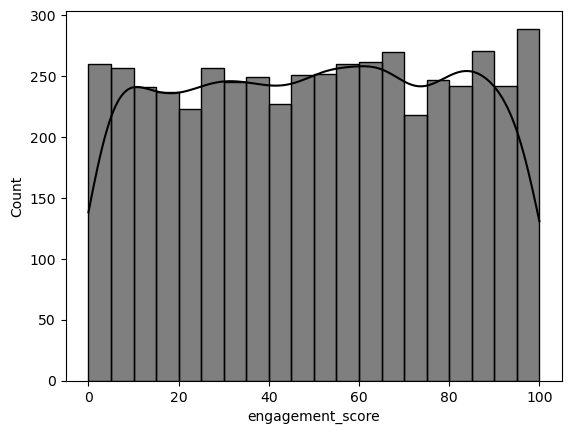

In [369]:
sns.histplot(data=data,x="engagement_score",bins=20,kde=True,color="black")

In [370]:
Num_col(data,"clicks")

Numerical Columns Analysis:
mean:2487.406
median:2469.0
mode:540
var:2048619.3850410066
std:1431.2998934678249
skew:0.024872121101895774
MIN:10
MAAX:5000
Range:4990


<Axes: xlabel='clicks', ylabel='Count'>

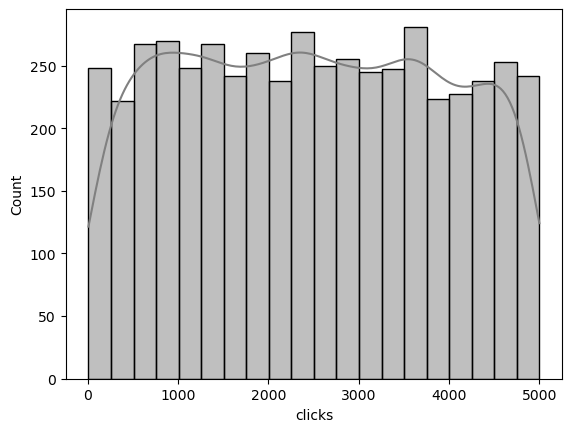

In [371]:
sns.histplot(data=data,x="clicks",bins=20,kde=True,color="gray")

In [372]:
Num_col(data,"read_time")

Numerical Columns Analysis:
mean:8.0056
median:8.0
mode:3
var:19.016171874374862
std:4.360753590192281
skew:0.015471379976519884
MIN:1
MAAX:15
Range:14


<Axes: xlabel='read_time', ylabel='Count'>

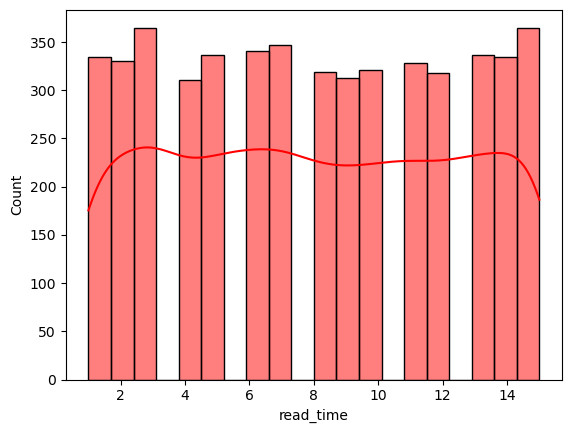

In [373]:
sns.histplot(data=data,x="read_time",bins=20,kde=True,color="red")

In [374]:
Num_col(data,"sentiment_score")

Numerical Columns Analysis:
mean:-0.0011567681011539041
median:0.0034961662887493
mode:-0.9998375105770336
var:0.32999247449253505
std:0.5744497145029624
skew:-0.003814082687508382
MIN:-0.9998375105770336
MAAX:0.9996680401161098
Range:1.9995055506931434


<Axes: xlabel='sentiment_score', ylabel='Count'>

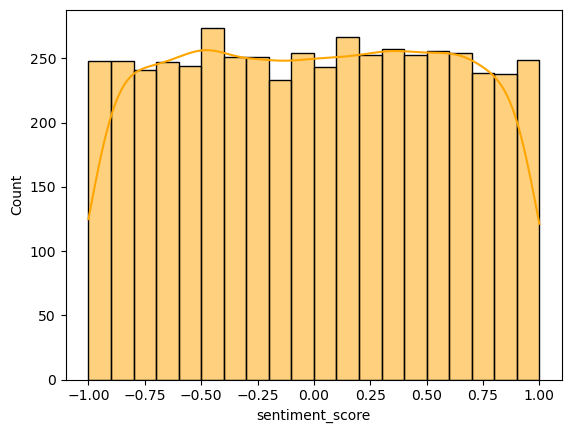

In [375]:
sns.histplot(data=data,x="sentiment_score",bins=20,kde=True,color="orange")

In [376]:
Num_col(data,"is_fake")

Numerical Columns Analysis:
mean:0.506
median:1.0
mode:1
var:0.2500140028005719
std:0.500014002604499
skew:-0.024008931466393674
MIN:0
MAAX:1
Range:1


<Axes: xlabel='is_fake', ylabel='Count'>

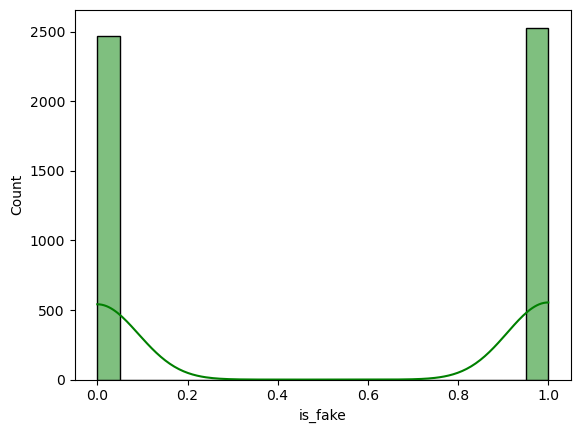

In [377]:
sns.histplot(data=data,x="is_fake",bins=20,kde=True,color="green")

In [378]:
# checking and handling of outliers

def Checking_and_Handling_Of_Outliers(data, col):
    sns.boxplot(data[col], color = "Red")
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = data[(data[col] < LowerTail) | (data[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)

    #HAndling of Outliers :
    data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    data.loc[data[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value

    print("After handling of Outliers data:\n")
    print(data.head())

In [379]:
data.dtypes

headline             object
author               object
content              object
source               object
published_date       object
engagement_score      int64
clicks                int64
read_time             int64
sentiment_score     float64
is_fake               int64
dtype: object

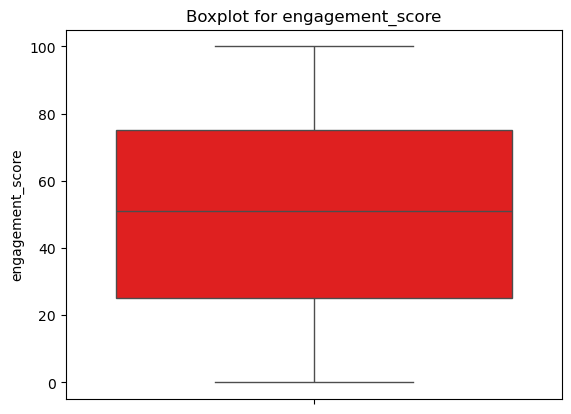

25% Quantile q1 = 25.0
75% Quantile q3 = 75.0
IQR = 50.0

--------------------------------------------------------------------------------
Lower Tail = -50.0
Upper Tail = 150.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [headline, author, content, source, published_date, engagement_score, clicks, read_time, sentiment_score, is_fake]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

     headline      author                    content         source  \
0  Headline 1   Anonymous  Content of news article 1           Blog   
1  Headline 2  Jane Smith  Content of news article 2    Independent   
2  Headline 3  Reporter X  Content of news article 3           Blog   
3  Headline 4   Anonymous  Content of news article 4  News Source 1   
4  Headline 5   Anonymous  Content of news article 5  News Source 1   

        published_date  engagement_sc

In [380]:
Checking_and_Handling_Of_Outliers(data, "engagement_score")

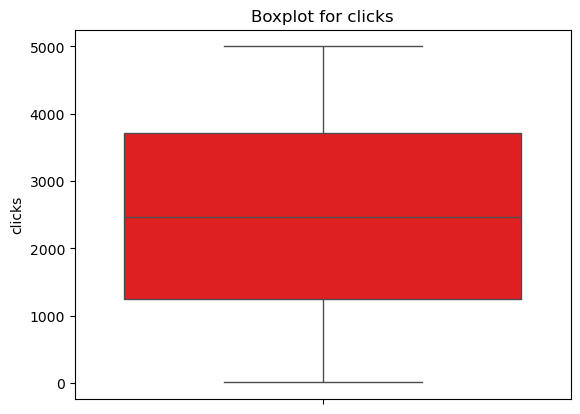

25% Quantile q1 = 1253.5
75% Quantile q3 = 3709.0
IQR = 2455.5

--------------------------------------------------------------------------------
Lower Tail = -2429.75
Upper Tail = 7392.25
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [headline, author, content, source, published_date, engagement_score, clicks, read_time, sentiment_score, is_fake]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

     headline      author                    content         source  \
0  Headline 1   Anonymous  Content of news article 1           Blog   
1  Headline 2  Jane Smith  Content of news article 2    Independent   
2  Headline 3  Reporter X  Content of news article 3           Blog   
3  Headline 4   Anonymous  Content of news article 4  News Source 1   
4  Headline 5   Anonymous  Content of news article 5  News Source 1   

        published_date  en

C:\Users\deshm\AppData\Local\Temp\ipykernel_21724\2491079757.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2429.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value


In [381]:
Checking_and_Handling_Of_Outliers(data, "clicks")

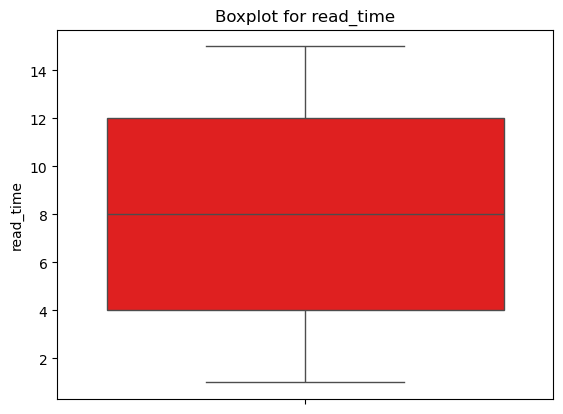

25% Quantile q1 = 4.0
75% Quantile q3 = 12.0
IQR = 8.0

--------------------------------------------------------------------------------
Lower Tail = -8.0
Upper Tail = 24.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [headline, author, content, source, published_date, engagement_score, clicks, read_time, sentiment_score, is_fake]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

     headline      author                    content         source  \
0  Headline 1   Anonymous  Content of news article 1           Blog   
1  Headline 2  Jane Smith  Content of news article 2    Independent   
2  Headline 3  Reporter X  Content of news article 3           Blog   
3  Headline 4   Anonymous  Content of news article 4  News Source 1   
4  Headline 5   Anonymous  Content of news article 5  News Source 1   

        published_date  engagement_score 

In [382]:
Checking_and_Handling_Of_Outliers(data, "read_time")

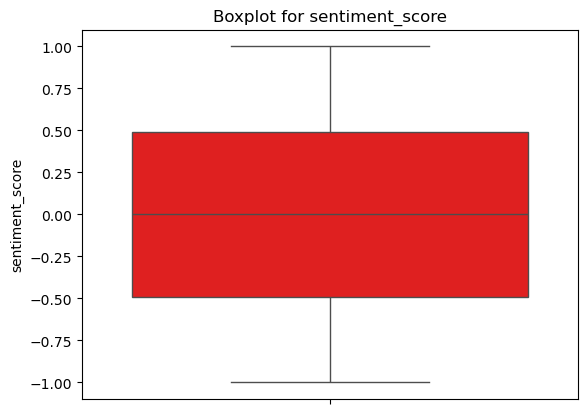

25% Quantile q1 = -0.491076466689592
75% Quantile q3 = 0.4912387902554199
IQR = 0.9823152569450119

--------------------------------------------------------------------------------
Lower Tail = -1.9645493521071098
Upper Tail = 1.9647116756729377
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [headline, author, content, source, published_date, engagement_score, clicks, read_time, sentiment_score, is_fake]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

     headline      author                    content         source  \
0  Headline 1   Anonymous  Content of news article 1           Blog   
1  Headline 2  Jane Smith  Content of news article 2    Independent   
2  Headline 3  Reporter X  Content of news article 3           Blog   
3  Headline 4   Anonymous  Content of news article 4  News Source 1   
4  Headline 5   Anonymous  Content of ne

In [383]:
Checking_and_Handling_Of_Outliers(data, "sentiment_score")

In [384]:
# Analysis of categorical Columns
def Cat_col(data, col):
    unique_values = data[col].unique()  # Fixed typo: renamed to unique_values
    value_counts = data[col].value_counts()
    mode = data[col].mode()[0]  # Fixed mode access by adding parentheses

    # Enhanced string formatting for clarity
    print(f"Unique Values in '{col}':\n{unique_values}\n")
    print(f"Value Counts in '{col}':\n{value_counts}\n")
    print(f"Mode of '{col}': {mode}\n")


    data[col].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(f"data-{col} (pie chart)")
    plt.show
    

In [385]:
data.dtypes

headline             object
author               object
content              object
source               object
published_date       object
engagement_score      int64
clicks              float64
read_time             int64
sentiment_score     float64
is_fake               int64
dtype: object

Unique Values in 'headline':
['Headline 1' 'Headline 2' 'Headline 3' ... 'Headline 4998'
 'Headline 4999' 'Headline 5000']

Value Counts in 'headline':
headline
Headline 1       1
Headline 3331    1
Headline 3338    1
Headline 3337    1
Headline 3336    1
                ..
Headline 1667    1
Headline 1666    1
Headline 1665    1
Headline 1664    1
Headline 5000    1
Name: count, Length: 5000, dtype: int64

Mode of 'headline': Headline 1



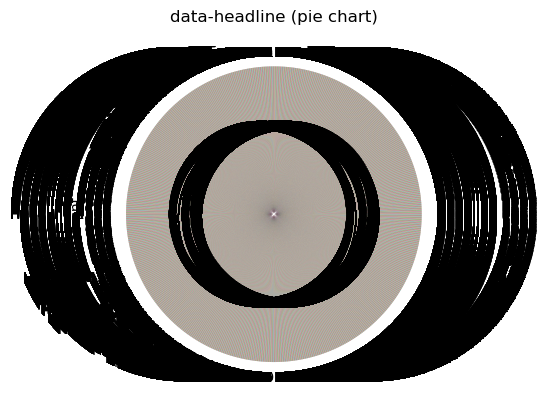

In [386]:
Cat_col(data, "headline")

Unique Values in 'author':
['Anonymous' 'Jane Smith' 'Reporter X' 'John Doe']

Value Counts in 'author':
author
John Doe      1283
Reporter X    1256
Jane Smith    1233
Anonymous     1228
Name: count, dtype: int64

Mode of 'author': John Doe



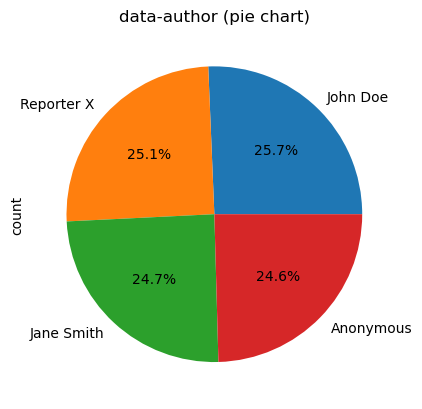

In [387]:
Cat_col(data, "author")

Unique Values in 'content':
['Content of news article 1' 'Content of news article 2'
 'Content of news article 3' ... 'Content of news article 4998'
 'Content of news article 4999' 'Content of news article 5000']

Value Counts in 'content':
content
Content of news article 1       1
Content of news article 3331    1
Content of news article 3338    1
Content of news article 3337    1
Content of news article 3336    1
                               ..
Content of news article 1667    1
Content of news article 1666    1
Content of news article 1665    1
Content of news article 1664    1
Content of news article 5000    1
Name: count, Length: 5000, dtype: int64

Mode of 'content': Content of news article 1



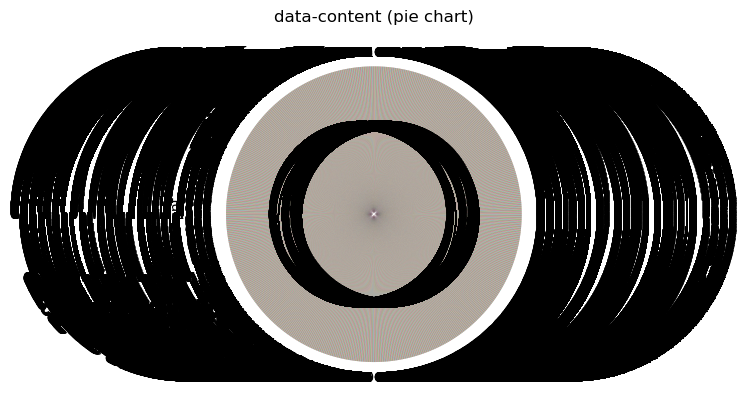

In [388]:
Cat_col(data, "content")

Unique Values in 'source':
['Blog' 'Independent' 'News Source 1' 'News Source 2']

Value Counts in 'source':
source
Blog             1291
News Source 2    1267
News Source 1    1235
Independent      1207
Name: count, dtype: int64

Mode of 'source': Blog



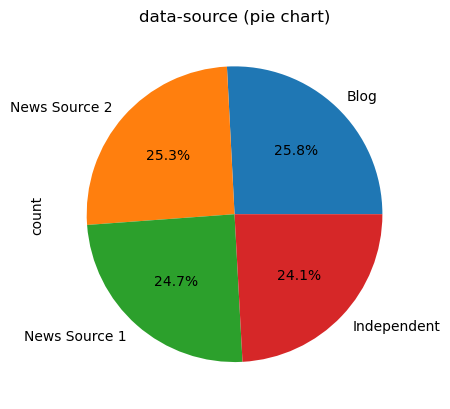

In [389]:
Cat_col(data, "source")

Unique Values in 'published_date':
['2019-01-01 00:00:00' '2019-01-01 06:00:00' '2019-01-01 12:00:00' ...
 '2022-06-03 06:00:00' '2022-06-03 12:00:00' '2022-06-03 18:00:00']

Value Counts in 'published_date':
published_date
2019-01-01 00:00:00    1
2021-04-12 12:00:00    1
2021-04-14 06:00:00    1
2021-04-14 00:00:00    1
2021-04-13 18:00:00    1
                      ..
2020-02-21 12:00:00    1
2020-02-21 06:00:00    1
2020-02-21 00:00:00    1
2020-02-20 18:00:00    1
2022-06-03 18:00:00    1
Name: count, Length: 5000, dtype: int64

Mode of 'published_date': 2019-01-01 00:00:00



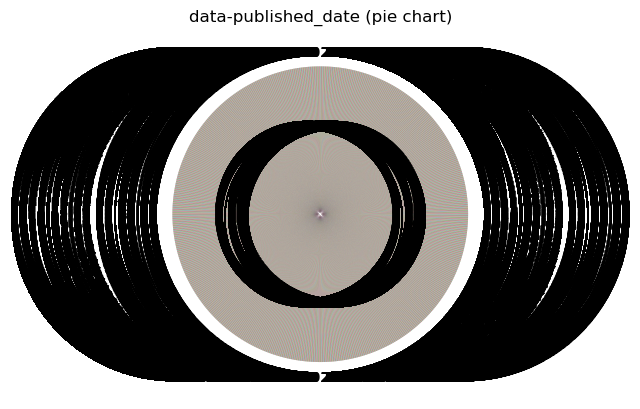

In [390]:
Cat_col(data, "published_date")

In [391]:
#Encoding of categorical columns
#headline 
data["headline"].unique()

array(['Headline 1', 'Headline 2', 'Headline 3', ..., 'Headline 4998',
       'Headline 4999', 'Headline 5000'], dtype=object)

In [392]:
data["headline"].value_counts

<bound method IndexOpsMixin.value_counts of 0          Headline 1
1          Headline 2
2          Headline 3
3          Headline 4
4          Headline 5
            ...      
4995    Headline 4996
4996    Headline 4997
4997    Headline 4998
4998    Headline 4999
4999    Headline 5000
Name: headline, Length: 5000, dtype: object>

In [393]:
def encode_headlines_with_loop(data, column_name):
    # Create a dictionary to map headlines to numeric values
    unique_values = data[column_name].unique()
    value_mapping = {value: idx for idx, value in enumerate(unique_values)}
    
    # Replace the values using a for loop
    for idx, value in enumerate(data[column_name]):
        data.at[idx, column_name] = value_mapping[value]
    
    return data




In [394]:
# Example usage
data = encode_headlines_with_loop(data, 'headline')

In [395]:
data = encode_headlines_with_loop(data, 'author')

In [396]:
data = encode_headlines_with_loop(data, 'content')

In [397]:
data = encode_headlines_with_loop(data, 'source')

In [398]:
def encode_datetime(data, column_name):
    data[column_name] = pd.to_datetime(data[column_name])  # Ensure the column is in datetime format
    data['year'] = data[column_name].dt.year
    data['month'] = data[column_name].dt.month
    data['day'] = data[column_name].dt.day
    data['hour'] = data[column_name].dt.hour
    data['minute'] = data[column_name].dt.minute
    data['day_of_week'] = data[column_name].dt.dayofweek  # 0 = Monday, 6 = Sunday
    data['day_of_year'] = data[column_name].dt.dayofyear  # Day of the year
    data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 if weekend, else 0
    return data


In [399]:
encode_datetime(data, "published_date")

,headline,author,content,source,published_date,engagement_score,clicks,read_time,sentiment_score,is_fake,year,month,day,hour,minute,day_of_week,day_of_year,is_weekend
0,0,0,0,0,2019-01-01 00:00:00,97,3318.0,13,0.393979,0,2019,1,1,0,0,1,1,0
1,1,1,1,1,2019-01-01 06:00:00,34,1943.0,4,0.354025,0,2019,1,1,6,0,1,1,0
2,2,2,2,0,2019-01-01 12:00:00,84,1817.0,2,0.637002,1,2019,1,1,12,0,1,1,0
3,3,0,3,2,2019-01-01 18:00:00,52,1022.0,9,0.211860,0,2019,1,1,18,0,1,1,0
4,4,0,4,2,2019-01-02 00:00:00,8,2801.0,1,0.419411,1,2019,1,2,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2,4995,1,2022-06-02 18:00:00,45,3867.0,9,-0.071253,0,2022,6,2,18,0,3,153,0
4996,4996,2,4996,0,2022-06-03 00:00:00,99,3548.0,1,0.447703,0,2022,6,3,0,0,4,154,0
4997,4997,2,4997,2,2022-06-03 06:00:00,25,3429.0,7,0.705092,0,2022,6,3,6,0,4,154,0
4998,4998,1,4998,0,2022-06-03 12:00:00,82,472.0,2,0.133213,0,2022,6,3,12,0,4,154,0


In [438]:
data.drop(columns=["published_date"],inplace=True)

In [440]:
data

,headline,author,content,source,engagement_score,clicks,read_time,sentiment_score,is_fake,year,month,day,hour,minute,day_of_week,day_of_year,is_weekend
0,0,0,0,0,97,3318.0,13,0.393979,0,2019,1,1,0,0,1,1,0
1,1,1,1,1,34,1943.0,4,0.354025,0,2019,1,1,6,0,1,1,0
2,2,2,2,0,84,1817.0,2,0.637002,1,2019,1,1,12,0,1,1,0
3,3,0,3,2,52,1022.0,9,0.211860,0,2019,1,1,18,0,1,1,0
4,4,0,4,2,8,2801.0,1,0.419411,1,2019,1,2,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2,4995,1,45,3867.0,9,-0.071253,0,2022,6,2,18,0,3,153,0
4996,4996,2,4996,0,99,3548.0,1,0.447703,0,2022,6,3,0,0,4,154,0
4997,4997,2,4997,2,25,3429.0,7,0.705092,0,2022,6,3,6,0,4,154,0
4998,4998,1,4998,0,82,472.0,2,0.133213,0,2022,6,3,12,0,4,154,0


In [448]:
data.drop(columns=["minute"],inplace=True)
data.drop(columns=["is_weekend"],inplace=True)

In [450]:
# Dependent Column (target)
data=data.loc[:,data.columns.difference(["is_fake"]).tolist() + ["is_fake"]]

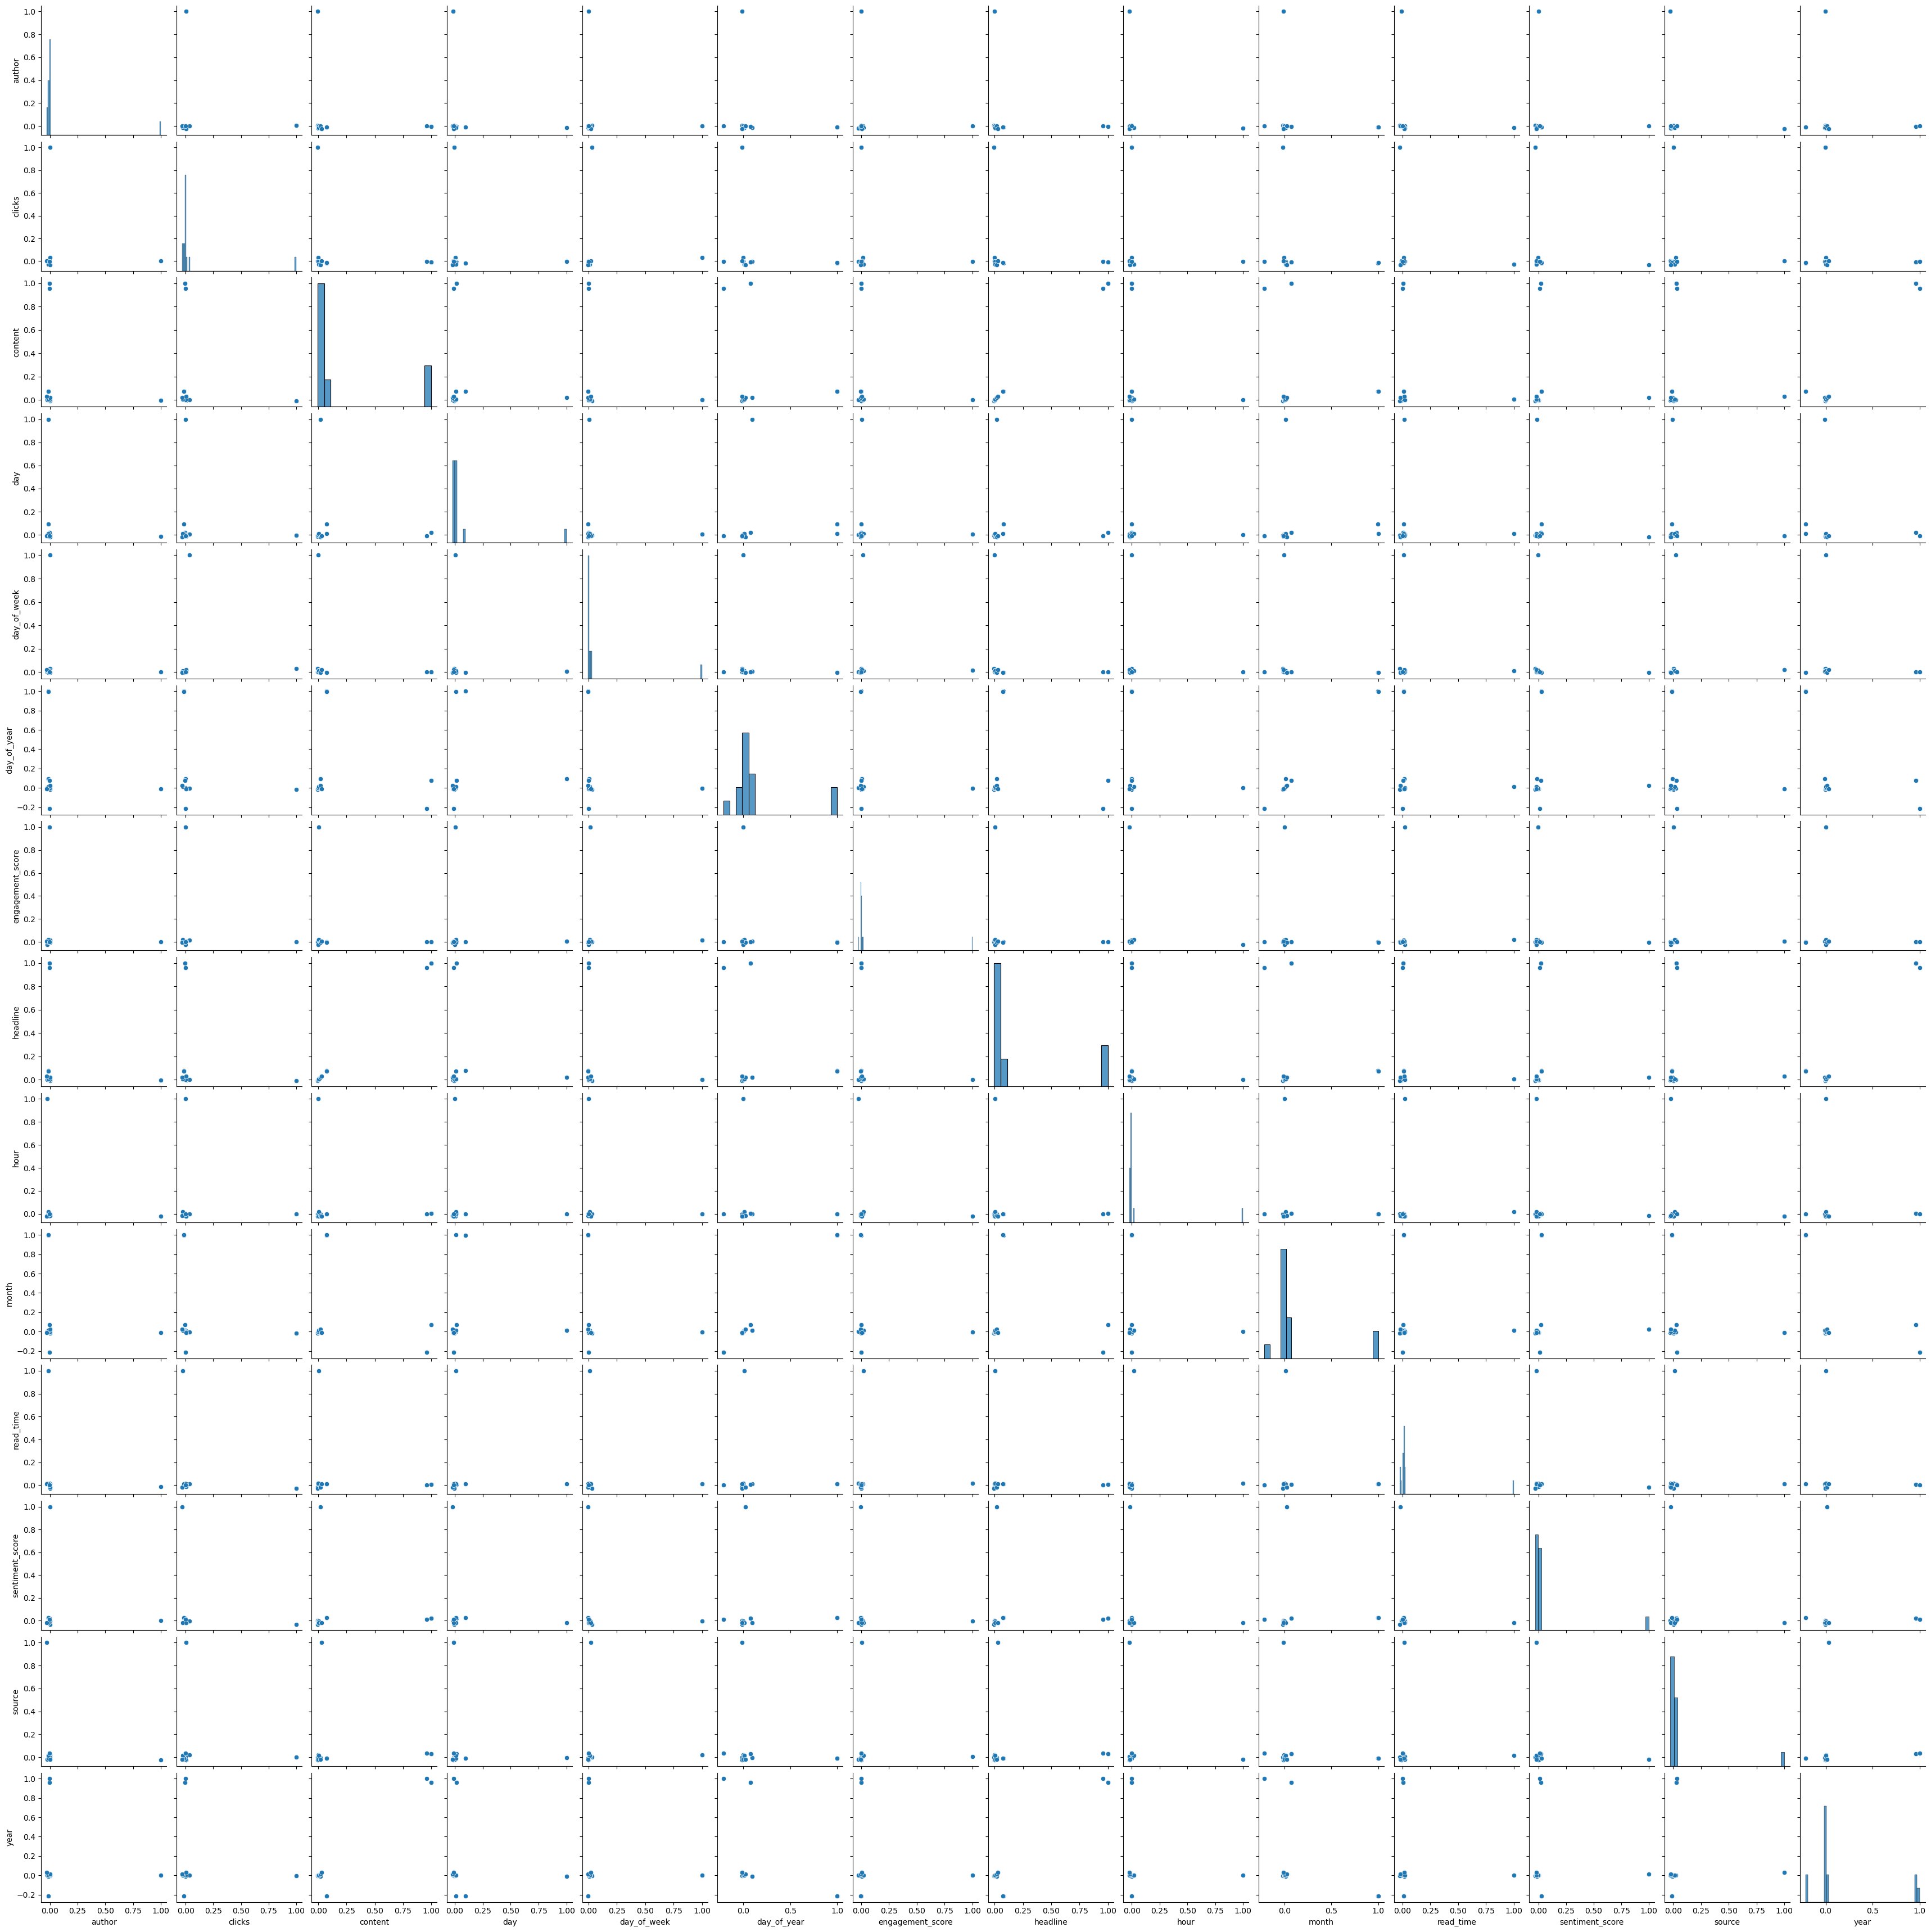

In [452]:
corr=data.iloc[:,:14].corr()
sns.pairplot(corr)


<Axes: >

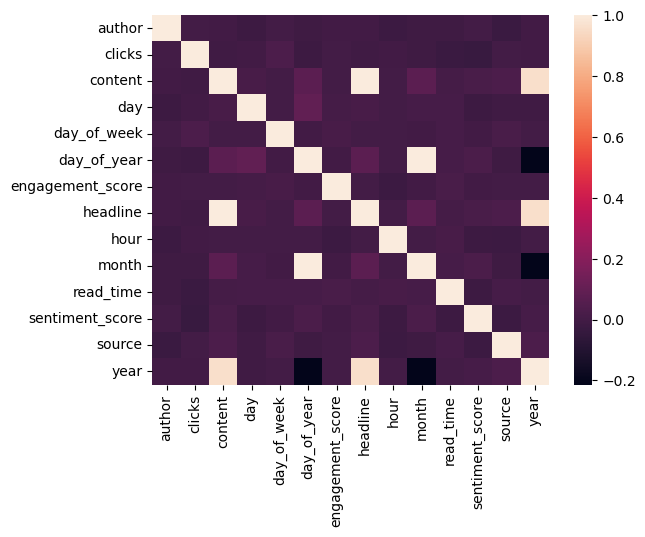

In [453]:
sns.heatmap(corr)

In [458]:
# Train-test split

X = data.drop(columns=['is_fake'])  # Replace 'target_column' with your target variable
Y = data['is_fake']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Shape of X_train: {xtrain.shape}')
print(f'Shape of X_test: {xtest.shape}')
print(f'Shape of y_train: {ytrain.shape}')
print(f'Shape of y_test: {ytest.shape}')

Shape of X_train: (4000, 14)
Shape of X_test: (1000, 14)
Shape of y_train: (4000,)
Shape of y_test: (1000,)
